<h1><font color = "seagreen"><center> Exploratory Data Analysis </h1></font ></center> 

<h2> Importing Libraries

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime

<h2> Importing Datasets

In [250]:
customers =  pd.read_csv("Customers.csv")
products =  pd.read_csv("Products.csv")
transactions =  pd.read_csv("Transactions.csv")

In [251]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [252]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [253]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [254]:
#Checking for missing values in each dataset

for df_name in ["customers", "transactions", "products"]:
    df = eval(df_name)  
    print(f"Missing values in {df_name}:\n")
    missing_counts = df.isna().sum().sort_values(ascending=False)  
    missing_percentages = (missing_counts / len(df)) * 100 
    missing_summary = pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing Percentage (%)": missing_percentages
    })
    print(missing_summary)
    print("\n" + "="*50 + "\n")

Missing values in customers:

              Missing Count  Missing Percentage (%)
CustomerID                0                     0.0
CustomerName              0                     0.0
Region                    0                     0.0
SignupDate                0                     0.0


Missing values in transactions:

                 Missing Count  Missing Percentage (%)
TransactionID                0                     0.0
CustomerID                   0                     0.0
ProductID                    0                     0.0
TransactionDate              0                     0.0
Quantity                     0                     0.0
TotalValue                   0                     0.0
Price                        0                     0.0


Missing values in products:

             Missing Count  Missing Percentage (%)
ProductID                0                     0.0
ProductName              0                     0.0
Category                 0                     0.0


<h4> No missing values identified in any of the dataset.

In [255]:
# Checking for duplicates in each dataset
for df_name in ["customers", "transactions", "products"]:
    df = eval(df_name)
    print(f"Duplicates in {df_name}:\n")
    duplicate_counts = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_counts}")
    print("\n" + "="*50 + "\n")


Duplicates in customers:

Number of duplicate rows: 0


Duplicates in transactions:

Number of duplicate rows: 0


Duplicates in products:

Number of duplicate rows: 0




<h4> No duplicates identified in any of the dataset

In [256]:
# Checking for more information for each DataFrame (Data types,Shape, Columns)
for df_name in ["customers", "transactions", "products"]:
    df = eval(df_name)  # Get the actual dataframe object
    print(f"Information about {df_name}:\n")
    df.info()    
    print("\n" + "="*50 + "\n")


Information about customers:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


Information about transactions:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), 

In [257]:
# Changing the datatype of transactionDate from object to date
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%Y-%m-%d %H:%M:%S')

# Check the data type
print(transactions['TransactionDate'].dtype)

datetime64[ns]


In [258]:
# Setting appropriate datetime format for SignupDate
customers['SignupDate'] = pd.to_datetime(customers['SignupDate']) 

<h2> Customers data

In [259]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [260]:
# Region wise customers
customers['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

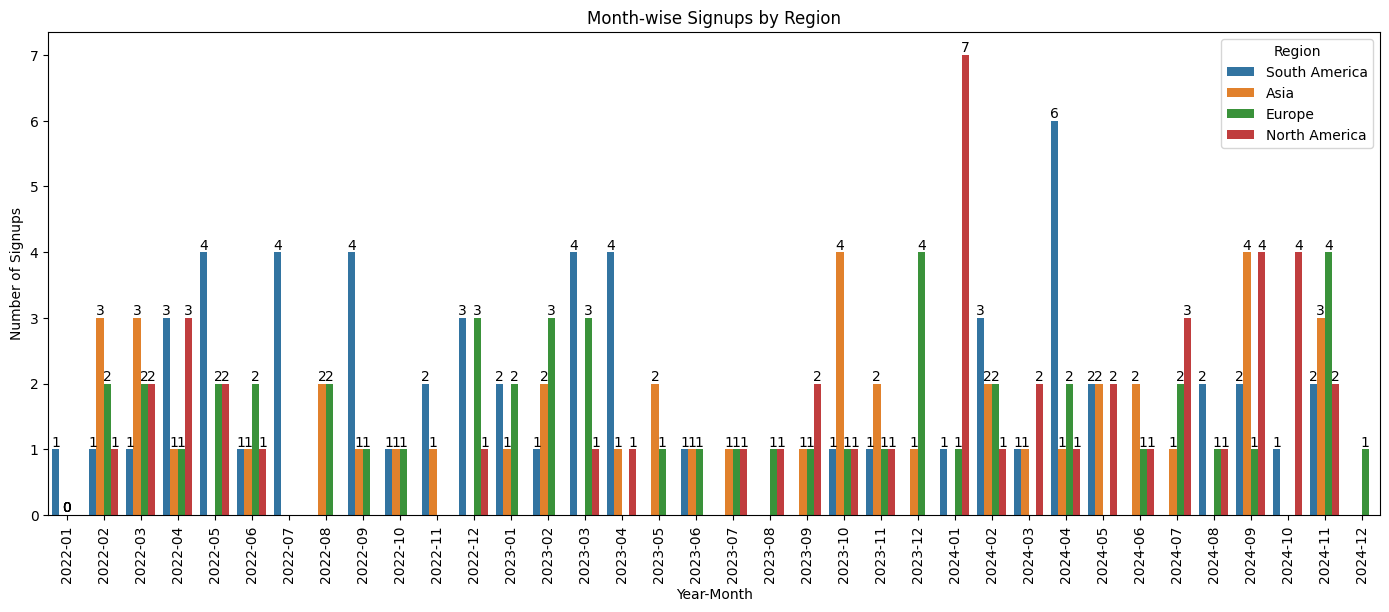

In [261]:
# Regionn wise customer signups per month
customers['SignupDate'] = pd.to_datetime(customers['SignupDate']) # Set datetime format for signup date
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M') 

# Count the number of signups per Year-Month and Region
monthly_region_signups = customers.groupby(['YearMonth', 'Region']).size().reset_index(name='Signups')

# Plot the barplot with hue for Region
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='YearMonth', y='Signups', hue='Region', data=monthly_region_signups)

# Adding data labels on top
for p in ax.patches:
    height = round(p.get_height())  
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels 
plt.xticks(rotation=90)  
plt.tight_layout()  

plt.title('Month-wise Signups by Region')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.show()


<h2> Products dataset

In [262]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [263]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


<h5> Average price of products is 267.55 USD. The cheapest product values at 16.08 USD whereas the most expensive values at 497.76 USD.

In [264]:
products['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [265]:
# Category wise average price of product.
category_avg_price = products.groupby('Category')['Price'].mean()
category_avg_price

Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64

<h2> Transactions data

In [266]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [267]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


<h5> Average order value (AOV) is 272.55 USD.

<h2> Performing Join operations to get more detailed insights.

In [268]:
transactions_customers = pd.merge(transactions,customers , on = "CustomerID",how ="inner")
transactions_customers

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024-04
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022-03
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,2022-01
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,2024-04
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,2024-09
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,2024-11


In [269]:
merged_df = pd.merge(transactions_customers, products, on="ProductID", how="inner")
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,YearMonth,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,2022-01,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,2024-04,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,2024-09,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,2024-11,SoundWave Smartwatch,Electronics,459.86


<h5> Performed inner join to include only matching rows in all 3 datasets.

In [270]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  YearMonth        1000 non-null   period[M]     
 11  ProductName      1000 non-null   object        
 12  Category         1000 non-null   object        
 13  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1

In [271]:
#dropping Price_y as it is repeating

merged_df.drop('Price_y',inplace=True,axis=1)

In [272]:
merged_df[merged_df.duplicated()]
merged_df = merged_df.rename(columns={'Price_x':'ProductPrice'})

In [273]:
# Checking if any NaN is present in column or not

merged_df.isna().any()

TransactionID      False
CustomerID         False
ProductID          False
TransactionDate    False
Quantity           False
TotalValue         False
ProductPrice       False
CustomerName       False
Region             False
SignupDate         False
YearMonth          False
ProductName        False
Category           False
dtype: bool

In [274]:
# Finding the number of unique values present in each column
merged_df.nunique()


TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
ProductPrice        100
CustomerName        199
Region                4
SignupDate          178
YearMonth            36
ProductName          66
Category              4
dtype: int64

In [275]:
merged_df.describe()

,TransactionDate,Quantity,TotalValue,ProductPrice,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,NaN


In [276]:
# Separating date and time
merged_df['DateTransaction'] = merged_df['TransactionDate'].dt.date
merged_df['TransactionDatetime'] = merged_df['TransactionDate'].dt.time

# Setting DateTime Data type format to transaction date as it is shown as object
merged_df['DateTransaction'] = pd.to_datetime(merged_df['DateTransaction'])


In [248]:
# Finding total sales in USD

total_sales = merged_df['TotalValue'].sum()
print("Total Sales till date:",total_sales,"USD")

# Total quantity
total_quantity = merged_df["Quantity"].sum()
print("Total Quantity Sold till date:",total_quantity)

# Average Sales per day
unique_days = merged_df['DateTransaction'].nunique()
average_sales_per_day = total_sales/unique_days
print("Average Daily Sales:",round(average_sales_per_day,2),"USD")

#Total Orders placed
print("Total orders placed:",merged_df['TransactionID'].nunique())

# average number of orders placed per customers
total_unique_customers = merged_df['CustomerID'].nunique()
average_order_count = merged_df['TransactionID'].count()/ total_unique_customers 
print("Average number of orders placed by customer:", average_order_count)

Total Sales till date: 689995.56 USD
Total Quantity Sold till date: 2537
Average Daily Sales: 2047.46 USD
Total orders placed: 1000
Average number of orders placed by customer: 5.025125628140704


In [277]:
# Identifying top products by sales and Quantity
top_product = merged_df.groupby("ProductName").agg(
    TotalQuantity=("Quantity", "sum"),
    TotalSales=("TotalValue", "sum")
).reset_index()

top_product['PercentageofTotalSales'] = round((top_product['TotalSales']/total_sales)*100,2)

In [278]:
most_performing_by_sales = top_product.sort_values(by="TotalSales", ascending=False)
most_performing_by_quantity = top_product.sort_values(by="TotalQuantity", ascending=False)

# Output the results
print("Most Performing Products by Sales:")
most_performing_by_sales

Most Performing Products by Sales:


,ProductName,TotalQuantity,TotalSales,PercentageofTotalSales
9,ActiveWear Smartwatch,100,39096.97,5.67
47,SoundWave Headphones,97,25211.64,3.65
52,SoundWave Novel,58,24507.90,3.55
4,ActiveWear Jacket,76,22712.56,3.29
6,ActiveWear Rug,79,22314.43,3.23
...,...,...,...,...
26,ComfortLiving Desk Lamp,26,1694.16,0.25
44,SoundWave Bluetooth Speaker,19,1223.22,0.18
30,ComfortLiving Rug,19,1063.81,0.15
10,ActiveWear T-Shirt,26,795.34,0.12


C:\Users\Ritesh\AppData\Local\Temp\ipykernel_17080\3487495502.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ProductName', y='TotalSales', data=top_5_by_sales, palette='Blues_d')


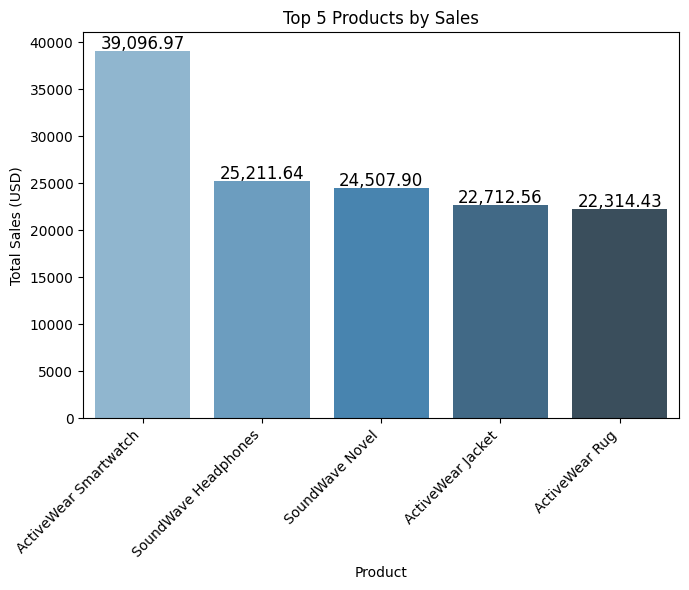

In [279]:
top_5_by_sales = most_performing_by_sales.head(5)

plt.figure(figsize=(7, 6))
ax = sns.barplot(x='ProductName', y='TotalSales', data=top_5_by_sales, palette='Blues_d')

plt.xlabel('Product')
plt.ylabel('Total Sales (USD)')
plt.title('Top 5 Products by Sales')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
# plt.savefig('top_5_products_by_sales.png', dpi=300)  
plt.show()

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_17080\1724218757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ProductName', y='TotalSales', data=bottom_5_by_sales, palette='Blues_d')


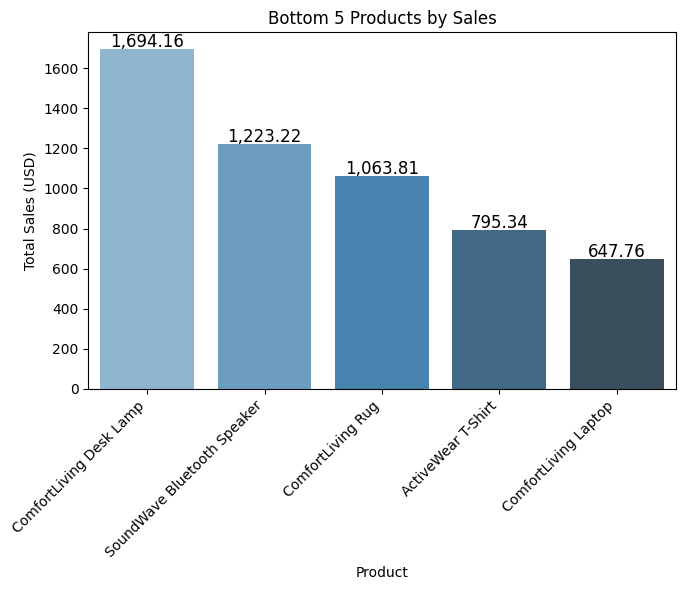

In [280]:
bottom_5_by_sales = most_performing_by_sales.tail(5)

plt.figure(figsize=(7, 6))
ax = sns.barplot(x='ProductName', y='TotalSales', data=bottom_5_by_sales, palette='Blues_d')

plt.xlabel('Product')
plt.ylabel('Total Sales (USD)')
plt.title('Bottom 5 Products by Sales')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
# plt.savefig('bottom_5_products_by_sales.png', dpi=300)  
plt.show()

In [281]:
print("\nMost Performing Products by Quantity:")
most_performing_by_quantity


Most Performing Products by Quantity:


,ProductName,TotalQuantity,TotalSales,PercentageofTotalSales
9,ActiveWear Smartwatch,100,39096.97,5.67
47,SoundWave Headphones,97,25211.64,3.65
36,HomeSense Desk Lamp,81,15701.32,2.28
6,ActiveWear Rug,79,22314.43,3.23
45,SoundWave Cookbook,78,15102.72,2.19
...,...,...,...,...
37,HomeSense Headphones,18,2860.74,0.41
50,SoundWave Laptop,16,4798.88,0.70
48,SoundWave Jacket,16,5676.96,0.82
22,BookWorld Wall Art,15,4875.15,0.71


In [282]:
# Bottom 10 products by total sales

most_performing_by_sales.tail(10)

,ProductName,TotalQuantity,TotalSales,PercentageofTotalSales
0,ActiveWear Biography,18,3047.40,0.44
37,HomeSense Headphones,18,2860.74,0.41
14,BookWorld Bluetooth Speaker,19,2790.15,0.40
27,ComfortLiving Headphones,15,2394.00,0.35
18,BookWorld Rug,18,1722.42,0.25
26,ComfortLiving Desk Lamp,26,1694.16,0.25
44,SoundWave Bluetooth Speaker,19,1223.22,0.18
30,ComfortLiving Rug,19,1063.81,0.15
10,ActiveWear T-Shirt,26,795.34,0.12
28,ComfortLiving Laptop,24,647.76,0.09


In [283]:
# Bottom 10 products by Total quantity

most_performing_by_quantity.tail(10)

,ProductName,TotalQuantity,TotalSales,PercentageofTotalSales
30,ComfortLiving Rug,19,1063.81,0.15
14,BookWorld Bluetooth Speaker,19,2790.15,0.40
0,ActiveWear Biography,18,3047.40,0.44
55,SoundWave T-Shirt,18,8672.04,1.26
18,BookWorld Rug,18,1722.42,0.25
37,HomeSense Headphones,18,2860.74,0.41
50,SoundWave Laptop,16,4798.88,0.70
48,SoundWave Jacket,16,5676.96,0.82
22,BookWorld Wall Art,15,4875.15,0.71
27,ComfortLiving Headphones,15,2394.00,0.35


In [284]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,CustomerName,Region,SignupDate,YearMonth,ProductName,Category,DateTransaction,TransactionDatetime
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics,2024-08-25,12:38:23
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics,2024-05-27,22:23:54
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics,2024-04-25,07:38:55
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics,2024-03-26,22:55:37
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics,2024-03-21,15:10:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,2022-01,SoundWave Smartwatch,Electronics,2024-10-24,08:30:27
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,2024-04,SoundWave Smartwatch,Electronics,2024-06-04,02:15:24
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,2024-09,SoundWave Smartwatch,Electronics,2024-04-05,13:05:32
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,2024-11,SoundWave Smartwatch,Electronics,2024-09-29,10:16:02


In [285]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionID        1000 non-null   object        
 1   CustomerID           1000 non-null   object        
 2   ProductID            1000 non-null   object        
 3   TransactionDate      1000 non-null   datetime64[ns]
 4   Quantity             1000 non-null   int64         
 5   TotalValue           1000 non-null   float64       
 6   ProductPrice         1000 non-null   float64       
 7   CustomerName         1000 non-null   object        
 8   Region               1000 non-null   object        
 9   SignupDate           1000 non-null   datetime64[ns]
 10  YearMonth            1000 non-null   period[M]     
 11  ProductName          1000 non-null   object        
 12  Category             1000 non-null   object        
 13  DateTransaction      1000 non-null

In [286]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,CustomerName,Region,SignupDate,YearMonth,ProductName,Category,DateTransaction,TransactionDatetime
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics,2024-08-25,12:38:23
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics,2024-05-27,22:23:54
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics,2024-04-25,07:38:55
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics,2024-03-26,22:55:37
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics,2024-03-21,15:10:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,2022-01,SoundWave Smartwatch,Electronics,2024-10-24,08:30:27
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,2024-04,SoundWave Smartwatch,Electronics,2024-06-04,02:15:24
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,2024-09,SoundWave Smartwatch,Electronics,2024-04-05,13:05:32
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,2024-11,SoundWave Smartwatch,Electronics,2024-09-29,10:16:02


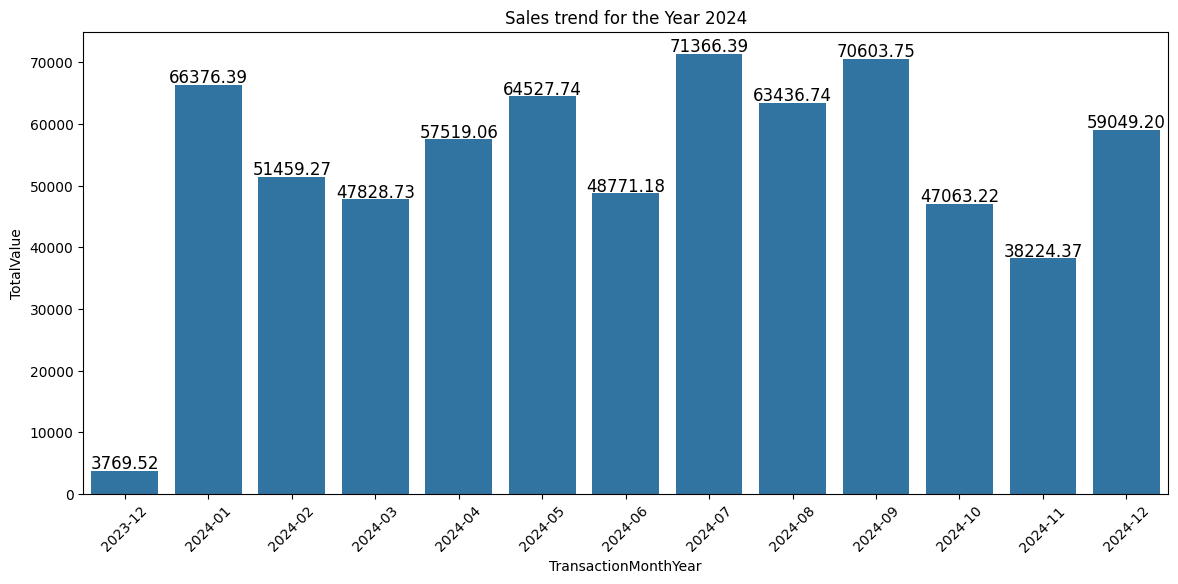

In [287]:
# Ensure 'DateTransaction' is in datetime format
merged_df['DateTransaction'] = pd.to_datetime(merged_df['DateTransaction'])

# Create a new column for 'Month-Year'
merged_df['TransactionMonthYear'] = merged_df['DateTransaction'].dt.to_period('M')

# Group by 'MonthYear' and sum the 'TotalValue'
monthly_data = merged_df.groupby('TransactionMonthYear', as_index=False)['TotalValue'].sum()

# Plot the data
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=monthly_data, x="TransactionMonthYear", y="TotalValue")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)
plt.title('Sales trend for the Year 2024')
# plt.savefig('Sales trend for the Year 2024.png', dpi=300)  
plt.show()


In [288]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,CustomerName,Region,SignupDate,YearMonth,ProductName,Category,DateTransaction,TransactionDatetime,TransactionMonthYear
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics,2024-08-25,12:38:23,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics,2024-05-27,22:23:54,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics,2024-04-25,07:38:55,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics,2024-03-26,22:55:37,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics,2024-03-21,15:10:10,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,2022-01,SoundWave Smartwatch,Electronics,2024-10-24,08:30:27,2024-10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,2024-04,SoundWave Smartwatch,Electronics,2024-06-04,02:15:24,2024-06
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,2024-09,SoundWave Smartwatch,Electronics,2024-04-05,13:05:32,2024-04
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,2024-11,SoundWave Smartwatch,Electronics,2024-09-29,10:16:02,2024-09


<h2> Heatmap for Sales by Region

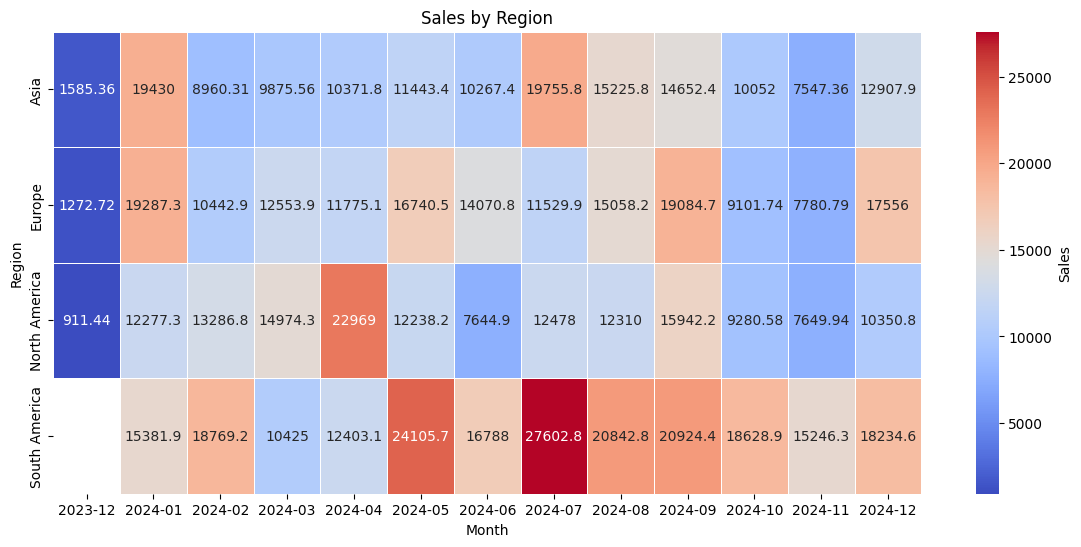

In [289]:
region_df = merged_df.pivot_table(index='Region', columns='TransactionMonthYear', values='TotalValue', aggfunc='sum')

plt.figure(figsize=(14, 6))  
sns.heatmap(region_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Sales'}, linewidths=0.5, fmt='g')

plt.title('Sales by Region')
plt.xlabel('Month')
plt.ylabel('Region')
# plt.savefig('Sales by Region.png', dpi=300)  
plt.show()

<h5> It is clear that South America has the best sales performance overall, with the highest sale of the month coming from South America at 27,602 USD ikn the month of July 2024.

In [290]:
# Most popular categories by region 
region_category_sales = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

# Sorting the result to get the most popular categories by region (highest sales first)
most_popular_categories_sorted = most_popular_categories.sort_values(by=['Region', 'TotalValue'], ascending=[True, False])

# Displaying the popular categories by region
most_popular_categories.sort_values(by = "Region")

,Region,Category,TotalValue
1,Asia,Clothing,49353.09
2,Asia,Electronics,35658.15
3,Asia,Home Decor,33944.70
0,Asia,Books,33119.03
4,Europe,Books,47464.42
6,Europe,Electronics,41562.60
7,Europe,Home Decor,40892.02
5,Europe,Clothing,36335.59
10,North America,Electronics,44716.43
8,North America,Books,41811.99


In [291]:
merged_df.groupby(['Region'])['TotalValue'].sum().reset_index()

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


In [292]:
merged_df.groupby(['Category'])['TotalValue'].sum().reset_index().sort_values(by='TotalValue',ascending= False)

,Category,TotalValue
0,Books,192147.47
2,Electronics,180783.50
1,Clothing,166170.66
3,Home Decor,150893.93


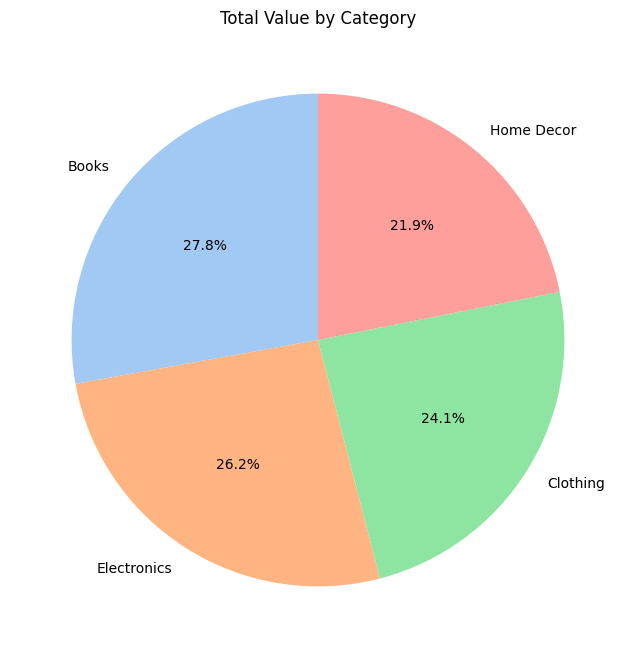

In [293]:
grouped_df = (
    merged_df.groupby(['Category'])['TotalValue']
    .sum()
    .reset_index()
    .sort_values(by='TotalValue', ascending=False)
)

# Extract the data for the pie chart
categories = grouped_df['Category']
values = grouped_df['TotalValue']

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(categories)]  # Use a Seaborn color palette
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Total Value by Category')
# plt.savefig('Total Value by Category.png', dpi=300)  
plt.show()

In [294]:
 customer_orders_value = merged_df.groupby('CustomerID').agg(
    TotalOrders=('TransactionID', 'count'),  
    TotalValue=('TotalValue', 'sum') 
).reset_index()

customer_orders_value.sort_values(by = "TotalValue",ascending=False).head(10)

,CustomerID,TotalOrders,TotalValue
140,C0141,10,10673.87
53,C0054,8,8040.39
64,C0065,10,7663.70
155,C0156,11,7634.45
81,C0082,7,7572.91
186,C0188,8,7111.32
58,C0059,8,7073.28
27,C0028,8,6819.57
98,C0099,8,6715.72
164,C0165,9,6708.10


5 Business insights identified:

1.Snapshot of key sales metrics:
    Total Sales 2024: $689k this Year.
    Average Sales Per Day: $2047.46 across all regions and categories
    Total Orders Placed: 1000, across all regions and categories
    Average Order Value (AOV): $272.55 <br>
    Average number of orders placed by customer: 5.025125628140704

Overall Average number of orders placed by a customer is roughly 5, which means customers are liking the products and are coming back to the marketplace.

2.  Regional Insights:

South America has the highest total value at $219,352.56, followed by Europe at $166,254.63 and North America at $152,313.40.
Asia has the lowest total value at $152,074.97, slightly below North America.<br>

3. Category Insights:<br>

Books have the highest total across all regions, with a combined value of $192,147.47.
Electronics follow closely with $180783.50, while Clothing  totals $166170.66.50.
Home Decor has the lowest total value at $150,893.93, although it is distributed across all regions.<br>

4. Regional Category Breakdown:

South America leads in Books (with $69,752.03) and Electronics (with $58,846.32), reflecting a strong preference for these categories.<br>

5. Opportunities for Focus:<br>

South America shows potential as a strong growth region, particularly for Books and Electronics, given their significant contributions.
Books, while maintaining consistent sales in North America, South America, and Europe, struggle to capture significant market share in Asia.
Electronics is the most consistent category across all regions, showing steady sales performance.
Home Decor and Clothing require targeted marketing campaigns and promotions to improve their sales.